In [7]:
import numpy as np
from keras.datasets import mnist
from keras.utils import to_categorical

# Load the MNIST dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Reshape and normalize the input data
X_train = X_train.reshape(-1, 28, 28, 1) / 255.0
X_test = X_test.reshape(-1, 28, 28, 1) / 255.0

# One-hot encode the target labels
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)


In [8]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

def build_model():
    model = Sequential([
        Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
        MaxPooling2D((2, 2)),
        Conv2D(64, (3, 3), activation='relu'),
        MaxPooling2D((2, 2)),
        Flatten(),
        Dense(64, activation='relu'),
        Dense(10, activation='softmax')
    ])
    return model

model = build_model()


In [9]:
from keras.optimizers import Adam
from keras.callbacks import ReduceLROnPlateau

# Compile the model
model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

# Define ReduceLROnPlateau callback
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=3, min_lr=0.0001)

# Train the model
history = model.fit(X_train, y_train, epochs=5, batch_size=128, validation_data=(X_test, y_test), callbacks=[reduce_lr])


Epoch 1/5
469/469 [==============================] - 46s 92ms/step - loss: 0.2354 - accuracy: 0.9322 - val_loss: 0.0675 - val_accuracy: 0.9782 - lr: 0.0010
Epoch 2/5
469/469 [==============================] - 41s 88ms/step - loss: 0.0654 - accuracy: 0.9801 - val_loss: 0.0558 - val_accuracy: 0.9826 - lr: 0.0010
Epoch 3/5
469/469 [==============================] - 43s 91ms/step - loss: 0.0469 - accuracy: 0.9856 - val_loss: 0.0370 - val_accuracy: 0.9879 - lr: 0.0010
Epoch 4/5
469/469 [==============================] - 42s 90ms/step - loss: 0.0353 - accuracy: 0.9889 - val_loss: 0.0385 - val_accuracy: 0.9879 - lr: 0.0010
Epoch 5/5
469/469 [==============================] - 43s 92ms/step - loss: 0.0298 - accuracy: 0.9904 - val_loss: 0.0421 - val_accuracy: 0.9869 - lr: 0.0010


In [4]:
# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test Loss: {loss}')
print(f'Test Accuracy: {accuracy}')


313/313 [==============================] - 3s 8ms/step - loss: 0.0326 - accuracy: 0.9897
Test Loss: 0.0326073057949543
Test Accuracy: 0.9897000193595886


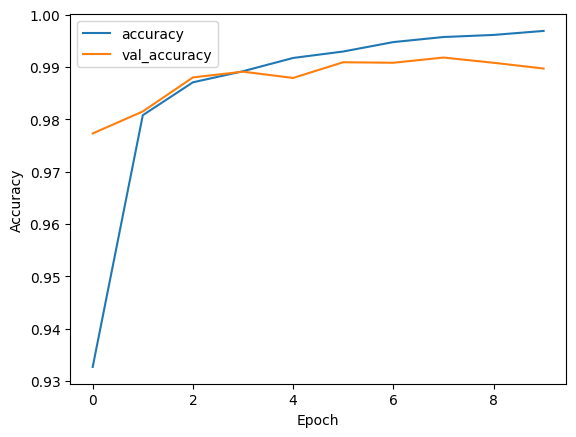

In [5]:
import matplotlib.pyplot as plt

# Plot training history
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()
